<p style='text-align: right;'><i>July 25th - 31th, 2023 </i> </p>

<h1 style="background-color:orange;"></h1>

<h1 style='text-align: center;'> ColMex Team Datathon 2023 </h1>

<h3 style='text-align: center;'> <i>PART I: EDA to narrow the scope </i> </h3>

<h5 style='text-align: center;'> <i>Our data journey</i> </h5>


<h1 style="background-color:orange;"></h1>

<div style="background-color:LightGray;"><p style='text-align: center;'><align = center>Participants: <i>Jose Niño, Eduardo Avelar, Andres Ruiz, Rodrigo Quezada </i></p></div>  

***

<h2 style='text-align: center;'><font color=blue> What is data telling us ? <color></h2>

***

<h2 style="background-color:Orange;"><font color=white>1. Intro<color></h2>

While would like to follow the CRISP-DM methodology it was not possible as the challenge for this Datathon does not start with specific objective or problem to solve rather starts at data available.

Thus key goal is :

<h3 style='text-align: center;'><b> "Create an innovative data solution <br>
    (web apps, chatbots, dashboards, model interfaces...) <br>
to empower businesses with insights from product reviews." </h3></p>

Also stated by Factored as:

"Embody a product a company's data team and develop an end-to-end data solution, to generate actionable insights to inform stakeholders' decisions."

Example of suggested questions offered:<br>
<br>
"<br>
● What has the most significant impact on customer satisfaction? <br>
● Can we infer customer segment based on their review patterns? <br>
● It's possible to build a recommendation system based on recommendations?
"


.

### Per Factored kickoff on data sources information:

" *There are two primary sources of data to work with.* 

##### The first source  [80% of data volume]

*Involves* **two batch-format tables** *containing valuable information and insights related to reviews for products that customers buy on Amazon. These batch tables are distributed in partitions and stored using JSON format files hosted in an Azure Data Lake Storage instance.* 

*Tables Included:*
- *Amazon Product Reviews: This is a large crawl of product reviews from Amazon. This dataset contains 82.83 million unique reviews from around 20 million users.*
- *Amazon Metadata: Contains the description and metadata for all products included in the dataset.*


##### The second source [20% of data volume]


*Involves Amazon Product Reviews, available in **streaming mode**, offering real-time data updates. The streaming topic continuously receives new data as it becomes available, enabling us to stay up-to-date with the latest developments.*

*The challenge for the Datathon is to effectively combine the data from both sources and use them as sources for analytics and machine learning purposes. Please take into consideration the objectives that are defined for the Data Engineering section to be sure that the solution that your team is proposing is compliant "*

### Last but not least we are usign the defined Evaluation Criteria for our solution


1. Overall project rationale and documentation
2. Data Engineering: How are you dealing with the Extraction 
and Transformation of the data
3. Machine Learning: Model selection, optimization, 
implementation and tracking
4. Data Analytics: Data Quality and Providing relevant insights 
from the solution
5. Software Engineering: Backend, Frontend and Deployment.

#### We will work through an iterative and incremental process 

<h2 style="background-color:Orange;"><font color=white>2. Problem <color></h2>

Our first step is to set the **Data Pipeline** to correctly ingest data with the right quality so it is delivered for initial analysis.

This step is also refered to as Data Engineering or Data Collection and by Google as Data Prep.

Thus our first step gathers a sample from which to begin the Data Understanding and per inferene also the Business 
Understanding.

 ### Imports and initial data set pull

> Getting started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

In [2]:
# Providing the data set the acronym of Reviews Data Set as rds from the extracted data
# For the initial data pull using option to skip bad lines and using the pipe separator "|"

datathon_reviews_sample_file = "/Users/dslab/Downloads/reviews.csv"
rds = pd.read_csv(datathon_reviews_sample_file, on_bad_lines='skip', sep = "|")

In [3]:
# Providing the data set the acronym of Metadata Data Set as mds from the extracted data
# For the initial data pull using option to skip bad lines and using the pipe separator "|"

datathon_metadata_sample_file = "/Users/dslab/Downloads/metadata.csv"
mds = pd.read_csv(datathon_metadata_sample_file, on_bad_lines='skip', sep = "|")

### EDA / Data Profiling

<br/>

> 1. Dimension shape

> 2. Check head and tail 

> 3. Review data types, column names, and identify missing data

> 4. Determine overall data quality


In [4]:
# Understand scope of sample data set for reviews

rds.shape

(13965, 8)

In [5]:
# Understand scope of sample data set for metadata

mds.shape

(10000, 18)

In [6]:
# Check initial display on reviews

rds.head(2)

,asin,overall,reviewText,reviewerID,reviewerName,summary,unixReviewTime,verified
0,B00005QDPX,5.0,Crazy Taxi is by far one of the best video gam...,A36TDX8DY2XK5Q,Some Kid,It's Party Time! Let's Have Some Fun!,1054252800,False
1,B00005QDPX,2.0,Anyone who hasn't played this game should rent...,A3PASG15BRR40D,SleepyJD,A fun game that gets old too quickly,1049414400,False


In [7]:
# Check initial display on metadata

mds.head(2)

,also_buy,also_view,asin,brand,category,date,description,details,feature,fit,image,main_cat,price,rank,similar_item,tech1,tech2,title
0,[],[],6305121869,Ninasill_Blouse,"['Clothing, Shoes & Jewelry', 'Women', 'Clothi...","<div class=""a-fixed-left-grid a-spacing-none"">...",['(=^ ^=) 1.It is made of high quality materia...,{},"['Import', 'Versatile Occasions - Great for Da...",NaN,['https://images-na.ssl-images-amazon.com/imag...,Movies & TV,$9.99 - $12.50,[],NaN,NaN,NaN,"Women Blouse, Ninasill Hooded Sweatshirt Coat ..."
1,[],[],6318708057,Coolred-Women,"['Clothing, Shoes & Jewelry', 'Traditional & C...","<div class=""a-fixed-left-grid a-spacing-none"">...","['<b><br>Hi friend, welcome to our store. Befo...",{},"['100% Spandex', 'Order Larger If You are Betw...",NaN,['https://images-na.ssl-images-amazon.com/imag...,"<img src=""https://images-na.ssl-images-amazon....",$16.08 - $18.36,"14,082,777 in Clothing, Shoes & Jewelry (",NaN,NaN,NaN,Coolred-Women Retro Split Sexy Skinny Premium ...


In [8]:
# Check overall data set information on column names, missing data and data types for reviews

rds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13965 entries, 0 to 13964
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            13965 non-null  object 
 1   overall         13965 non-null  float64
 2   reviewText      13965 non-null  object 
 3   reviewerID      13965 non-null  object 
 4   reviewerName    13963 non-null  object 
 5   summary         13965 non-null  object 
 6   unixReviewTime  13965 non-null  int64  
 7   verified        13965 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 777.5+ KB


In [9]:
# Check overall data set information on column names, missing data and data types for metadata

mds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   also_buy      10000 non-null  object 
 1   also_view     10000 non-null  object 
 2   asin          10000 non-null  object 
 3   brand         7315 non-null   object 
 4   category      10000 non-null  object 
 5   date          8940 non-null   object 
 6   description   10000 non-null  object 
 7   details       10000 non-null  object 
 8   feature       10000 non-null  object 
 9   fit           1864 non-null   object 
 10  image         10000 non-null  object 
 11  main_cat      10000 non-null  object 
 12  price         4064 non-null   object 
 13  rank          10000 non-null  object 
 14  similar_item  155 non-null    object 
 15  tech1         68 non-null     object 
 16  tech2         0 non-null      float64
 17  title         10000 non-null  object 
dtypes: float64(1), object(17)
m

### Initial observations

***

- We are going to need several transformations as most of the items are data type Object(strings) at both data sets.
- We shall drop the columns [similar_item,tech1,tech2] and likely also [fit] at Metadata per low information gain (too many NaN values)
- Brand is filled 73% of the time. Wished it was higher for better brand Vs brand comparisons we have discussed.
- Next step before data cleaning is confirm if there are enough overlaps among the current data sets


#### Checking relationship of asin among the 2 data frames

In [10]:
# Reviews data set against Metadata data set

rds['asin'].isin(mds['asin']).value_counts()

False    13964
True         1
Name: asin, dtype: int64

In [11]:
# Metadata data set against Reviews data set

mds['asin'].isin(rds['asin']).value_counts()

False    9999
True        1
Name: asin, dtype: int64

<div class="alert alert-block alert-warning">
<h2> Process Insights by EOD 7/26/2023</h2>
-------------------------------------------------------------------------------------------------------------------------------

     First data iteration does not provide enough overlap thus we need to improve the Data Pipeline process.
        
     Thus, moving into a larger data sample which is now 1 % from the overall provided data in the 80% batch.

</div>

### Imports and initial data set pull

> Getting started

In [12]:
# Providing the new data set again the acronym of Reviews Data Set as rds from the extracted data

datathon_reviews_pkt_file = "/Users/dslab/Downloads/reviews_sample_1p.parquet"
rds = pd.read_parquet(datathon_reviews_pkt_file, engine='pyarrow')

In [13]:
# Providing the new data set again the acronym of Reviews Data Set as rds from the extracted data

datathon_metadata_pkt_file = "/Users/dslab/Downloads/metadata_sample_1p.parquet"
mds = pd.read_parquet(datathon_metadata_pkt_file, engine='pyarrow')

### EDA / Data Profiling

<br/>

> 1. Dimension shape

> 2. Check overlap among both data sets (per the former iteration lesson learned)

In [14]:
# Understand scope of new 1% sample data set for reviews

rds.shape

(1499752, 11)

In [15]:
# Understand scope of new 1% sample data set for metadata

mds.shape

(150000, 18)

#### Checking relationship of asin among the 2 data frames

In [16]:
# Reviews data set against Metadata data set

rds['asin'].isin(mds['asin']).value_counts()

False    1475566
True       24186
Name: asin, dtype: int64

In [17]:
# Metadata data set against Reviews data set

mds['asin'].isin(rds['asin']).value_counts()

False    144387
True       5613
Name: asin, dtype: int64

<div class="alert alert-block alert-warning">
<h2> Process Insights 7/27/2023</h2>
-------------------------------------------------------------------------------------------------------------------------------

     Second data iteration shows Data Pipeline process improvement by increasing the overlaps.
    
     We increased reviews from 13,965 to 1'499,752 records and metadata from 10,000 to 150,000 records.
        
     Before reducing the data sets by combining it is worth to begin understanding the data set behavior as it is a mix
     of products among different categories/industries so worth a deeper dive to better refine the next steps.

</div>

### EDA / Data Profiling to the already extrated data set of Reviews to better understand scoring

<br/>

> 1. Check head and tail 

> 2. Review data types, column names, and identify missing data

> 3. Determine overall data quality


In [18]:
# Zooming into the 1% data sample across industries/categories for the Review data set starting with top of data set

rds.head()

,asin,overall,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,image
0,B00CGYCNZI,4.0,I have used Panasonic and GE earlier as my cor...,AOZOE2033AQK,Ramesh,"{""Style:"":"" 2 Handset""}",Worth the Value and Love it..,1472342400,true,None,None
1,B000V8CZYA,2.0,"The sound quality is great, but a bit of cosme...",A1AJFYLPI8M1LI,Buyer in Texas,None,"Expensive, hard to navigate menus",1196553600,true,None,None
2,B00CGYCNZI,2.0,did not last very long no longer working,A2X5NQN9TH9UUX,rufino maduena,"{""Style:"":"" 2 Handset""}",Two Stars,1471996800,true,None,None
3,B000V8CZYA,3.0,I purchased the original iFP-100 series (iFP-1...,A2J8DK06LK1ULY,R. H. Lee,None,"As they say, they don't make 'em like they use...",1196208000,true,None,None
4,B00CGYCNZI,5.0,Work very well.,A1YH5WS62ADB7M,Amazon Customer,"{""Style:"":"" 2 Handset""}",Five Stars,1471651200,true,None,None


In [19]:
# Zooming into the 1% data sample across industries/categories for the Review data set starting with bottom of data set

rds.tail()

,asin,overall,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,image
55928,B00GTU2WJ2,5.0,Have you ever noticed that a smell can transpo...,A30X9M0J5WOVAS,Amazon Customer,None,No Cook Should be Without One!,1392508800,false,19,None
55929,0356500624,5.0,I have read all of the Mercy Thompson books mu...,AGPGV5MAAB9GE,S Luedtke,"{""Format:"":"" Kindle Edition""}",I wish I could meet these characters!,1394668800,true,None,None
55930,B00GTU2WJ2,5.0,"Love the weight and length of this product, it...",A3HH4SFN5P4W6H,StephyG,None,practical and pretty,1392422400,false,None,None
55931,0356500624,5.0,Patricia has us following Mercy through numero...,A36LAGWPKOKH1R,Elaine Hopkins,"{""Format:"":"" Kindle Edition""}",Mercy in a familiar situation,1394496000,false,None,None
55932,B00GTU2WJ2,5.0,I was a little worried at first that the grate...,A2PNIJMDXGD9WI,Chrystal Mahan,None,Another Utensil to Add to My Collection,1391990400,false,None,None


In [20]:
# Zooming into the 1% data sample across industries/categories for the Review data set on missing values, column names and data types

rds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499752 entries, 0 to 55932
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   asin            1499752 non-null  object
 1   overall         1499752 non-null  object
 2   reviewText      1498878 non-null  object
 3   reviewerID      1499752 non-null  object
 4   reviewerName    1499677 non-null  object
 5   style           1010222 non-null  object
 6   summary         1499318 non-null  object
 7   unixReviewTime  1499752 non-null  object
 8   verified        1499752 non-null  object
 9   vote            232669 non-null   object
 10  image           22240 non-null    object
dtypes: object(11)
memory usage: 137.3+ MB


In [21]:
# Zooming into the 1% data sample across industries/categories for the Review data set starting with summary statistics

rds.describe()

,asin,overall,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,image
count,1499752,1499752,1498878,1499752,1499677,1010222,1499318,1499752,1499752,232669,22240
unique,129876,5,1386614,1300682,848318,36302,835518,7476,2,443,22181
top,B00571F26Y,5.0,Great,A2F6N60Z96CAJI,Amazon Customer,"{""Format:"":"" Kindle Edition""}",Five Stars,1461024000,true,2,"[""88""]"
freq,6114,942098,2719,136,110843,277609,248136,1902,1196297,79233,9


<div class="alert alert-block alert-warning">
<h2> Process Insights 7/28/2023</h2>
-------------------------------------------------------------------------------------------------------------------------------

     This second data iteration has potential so worth moving into data cleaning/munching/prep/wrangling.
    
     Here the data observed needs:
     
    
* We are going to need transformations as all items are data type Object(strings). <br>
    
     - We shall drop the columns:  *image, vote, and style* per low information gain (and many NaN values).
     - Columns *reviewerID and reviewerName* are related yet reviewerID is free of missing values, thus removing the *reviewerName* column as well
     - Suggest changing name to *overall* into **score** and data type to int64 as is likely the target variable.
     - Potentialy reduce into smaller dataframes for visualizations and begin corelations
     - Likely feature engineering will be beneficial
     - Heavy string at column reviewText is target for further analysis and summary will be quite useful as well    
</div>

## Initial prep work prior to EDA

> Rename overall column to score as if we decide on predictive ML this will be the Target Variable

> Drop the columns that are not providing enough information gain

> Change score column data type to int64

> Change unixReviewTime column data type to datetime64[ns] to make it more human readable friendly

> Change the unixReviewTime column name timestamp now that it has the friendly display

> Sort by timestamp and reset index to match the new order

> Add feature engineering for dates as will be helpful for the data analysis phase

> Convert date column from object to date data type M8[ns]

> Final check to confirm the null values left are unavoidable and thus keeping those

In [22]:
# Changing the column name at current 1% scope Review Data Set

rds.rename(columns = {'overall':'score'}, inplace = True)
rds.head(1)

,asin,score,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,image
0,B00CGYCNZI,4.0,I have used Panasonic and GE earlier as my cor...,AOZOE2033AQK,Ramesh,"{""Style:"":"" 2 Handset""}",Worth the Value and Love it..,1472342400,true,None,None


In [23]:
# Remove columns that are not needed

rds.drop(['style','vote','image', 'reviewerName'], axis = 1, inplace = True)
rds.head(1)

,asin,score,reviewText,reviewerID,summary,unixReviewTime,verified
0,B00CGYCNZI,4.0,I have used Panasonic and GE earlier as my cor...,AOZOE2033AQK,Worth the Value and Love it..,1472342400,true


In [24]:
# Change score to int64 data type

rds['score'].replace(['1.0', '2.0', '3.0', '4.0', '5.0'], [1, 2, 3, 4, 5], inplace = True)
rds.dtypes

asin              object
score              int64
reviewText        object
reviewerID        object
summary           object
unixReviewTime    object
verified          object
dtype: object

In [25]:
rds['unixReviewTime'] = pd.to_datetime(rds['unixReviewTime'], unit='s')
rds.dtypes

asin                      object
score                      int64
reviewText                object
reviewerID                object
summary                   object
unixReviewTime    datetime64[ns]
verified                  object
dtype: object

In [26]:
# Now change the name to timestamp

rds.rename(columns = {'unixReviewTime':'timestamp'}, inplace = True)
rds.head(1)

,asin,score,reviewText,reviewerID,summary,timestamp,verified
0,B00CGYCNZI,4,I have used Panasonic and GE earlier as my cor...,AOZOE2033AQK,Worth the Value and Love it..,2016-08-28,true


In [27]:
# Sorting data set per time line and reseting index

rds.sort_values(by = ['timestamp'], inplace = True)
rds.reset_index(inplace = True, drop = True)
rds.head()

,asin,score,reviewText,reviewerID,summary,timestamp,verified
0,0871202433,5,"Robert Sylwester's much overlooked book, A Cel...",A2API7H1WS1C56,"A Celebration of Neurons, by Robert Sylwester,",1997-08-09,false
1,0061535680,1,"Trivia. Dialogue waste of time, paper and add...",AAW5NRUVURHU2,poor entry in derby of books written by lawyers,1997-08-13,false
2,0316332259,5,Twenty years after his sudden death and a resu...,A1IBMUD9XXD68X,An Icon of His Era And Of All Time,1997-08-17,false
3,0933149581,3,The author writes about the education of speci...,A1LOZWO9JTN5L8,Wings to Fly: Bringing Theatre Arts to Student...,1997-08-21,false
4,0356108163,4,A really nice collection of stories by Stephen...,A2ILUXA828DESI,No bones to pick about this book,1997-08-23,false


In [28]:
# Checking sorting at the end of the data set as well

rds.tail()

,asin,score,reviewText,reviewerID,summary,timestamp,verified
1499747,B01EJF0FKQ,5,Fine quality and very reasonable price. I loo...,A22SCCVUPRAL27,So easy and great quality,2018-09-28,true
1499748,B01EJFIR92,5,It is great for my son's middle school gym class!,A7130LKDYGBGN,Bigger than it looks!,2018-09-28,true
1499749,B01ELKP504,5,Thank you for the speedy delivery and great pa...,A4JRPFF2ZQZ41,What you see is what you get!,2018-09-28,true
1499750,B01ELB7IY4,3,There was no support as if you would get buyin...,A3G0E41060K5T4,not really bathing suit material....,2018-09-28,true
1499751,B01ELFB7J2,5,Was hesitant but definitely feeling good about...,A17GM6PCT98HBD,Nice socks,2018-09-28,true


In [29]:
# Some feature engineering for time and date

rds['date'] = pd.to_datetime(rds['timestamp']).dt.date
rds['year'] = pd.to_datetime(rds['timestamp']).dt.year
rds['month'] = pd.to_datetime(rds['timestamp']).dt.month
rds['day'] = pd.to_datetime(rds['timestamp']).dt.day
rds['day_of_week'] = pd.to_datetime(rds['timestamp']).dt.dayofweek
rds.head(1)

,asin,score,reviewText,reviewerID,summary,timestamp,verified,date,year,month,day,day_of_week
0,0871202433,5,"Robert Sylwester's much overlooked book, A Cel...",A2API7H1WS1C56,"A Celebration of Neurons, by Robert Sylwester,",1997-08-09,false,1997-08-09,1997,8,9,5


In [30]:
# Confirm data types

rds.dtypes

asin                   object
score                   int64
reviewText             object
reviewerID             object
summary                object
timestamp      datetime64[ns]
verified               object
date                   object
year                    int64
month                   int64
day                     int64
day_of_week             int64
dtype: object

In [31]:
# Convert date column from object to date

rds['date'] = pd.to_datetime(rds['date'])
rds['date'].dtypes


dtype('<M8[ns]')

In [32]:
rds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499752 entries, 0 to 1499751
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   asin         1499752 non-null  object        
 1   score        1499752 non-null  int64         
 2   reviewText   1498878 non-null  object        
 3   reviewerID   1499752 non-null  object        
 4   summary      1499318 non-null  object        
 5   timestamp    1499752 non-null  datetime64[ns]
 6   verified     1499752 non-null  object        
 7   date         1499752 non-null  datetime64[ns]
 8   year         1499752 non-null  int64         
 9   month        1499752 non-null  int64         
 10  day          1499752 non-null  int64         
 11  day_of_week  1499752 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 137.3+ MB


In [33]:
# Final confirmation on null values and that they do not interfere with the analyisis

rds.isnull().sum()

asin             0
score            0
reviewText     874
reviewerID       0
summary        434
timestamp        0
verified         0
date             0
year             0
month            0
day              0
day_of_week      0
dtype: int64

In [34]:
# Final summary statistics of the current 1% scope Review Data Set

rds.describe(include='all', datetime_is_numeric=True)

,asin,score,reviewText,reviewerID,summary,timestamp,verified,date,year,month,day,day_of_week
count,1499752,1.499752e+06,1498878,1499752,1499318,1499752,1499752,1499752,1.499752e+06,1.499752e+06,1.499752e+06,1.499752e+06
unique,129876,NaN,1386614,1300682,835518,NaN,2,NaN,NaN,NaN,NaN,NaN
top,B00571F26Y,NaN,Great,A2F6N60Z96CAJI,Five Stars,NaN,true,NaN,NaN,NaN,NaN,NaN
freq,6114,NaN,2719,136,248136,NaN,1196297,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.217880e+00,NaN,NaN,NaN,2014-12-22 09:53:56.733540352,NaN,2014-12-22 09:53:56.733540352,2.014488e+03,6.365350e+00,1.569132e+01,2.849010e+00
min,NaN,1.000000e+00,NaN,NaN,NaN,1997-08-09 00:00:00,NaN,1997-08-09 00:00:00,1.997000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,NaN,4.000000e+00,NaN,NaN,NaN,2014-03-26 00:00:00,NaN,2014-03-26 00:00:00,2.014000e+03,3.000000e+00,8.000000e+00,1.000000e+00
50%,NaN,5.000000e+00,NaN,NaN,NaN,2015-10-02 00:00:00,NaN,2015-10-02 00:00:00,2.015000e+03,6.000000e+00,1.600000e+01,3.000000e+00
75%,NaN,5.000000e+00,NaN,NaN,NaN,2016-12-25 00:00:00,NaN,2016-12-25 00:00:00,2.016000e+03,9.000000e+00,2.300000e+01,5.000000e+00
max,NaN,5.000000e+00,NaN,NaN,NaN,2018-09-28 00:00:00,NaN,2018-09-28 00:00:00,2.018000e+03,1.200000e+01,3.100000e+01,6.000000e+00


In [35]:
print(f'Amount of years in this data set is :')
print(len(rds['year'].unique()))

Amount of years in this data set is :
22


In [36]:
print(f'List/array of years in this data set in order:')
print(rds['year'].unique())

List/array of years in this data set in order:
[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018]


In [37]:
# we can by now drop the timestamp column as date with time is not needed

rds.drop(['timestamp'], axis = 1, inplace = True)
rds.head(1)

,asin,score,reviewText,reviewerID,summary,verified,date,year,month,day,day_of_week
0,0871202433,5,"Robert Sylwester's much overlooked book, A Cel...",A2API7H1WS1C56,"A Celebration of Neurons, by Robert Sylwester,",false,1997-08-09,1997,8,9,5


In [38]:
# we can finally add another feature engineering column for reference for counting called "cnt" with a constant

rds['cnt'] = pd.Series([1 for x in range(len(rds.index))])
rds.head()

,asin,score,reviewText,reviewerID,summary,verified,date,year,month,day,day_of_week,cnt
0,0871202433,5,"Robert Sylwester's much overlooked book, A Cel...",A2API7H1WS1C56,"A Celebration of Neurons, by Robert Sylwester,",false,1997-08-09,1997,8,9,5,1
1,0061535680,1,"Trivia. Dialogue waste of time, paper and add...",AAW5NRUVURHU2,poor entry in derby of books written by lawyers,false,1997-08-13,1997,8,13,2,1
2,0316332259,5,Twenty years after his sudden death and a resu...,A1IBMUD9XXD68X,An Icon of His Era And Of All Time,false,1997-08-17,1997,8,17,6,1
3,0933149581,3,The author writes about the education of speci...,A1LOZWO9JTN5L8,Wings to Fly: Bringing Theatre Arts to Student...,false,1997-08-21,1997,8,21,3,1
4,0356108163,4,A really nice collection of stories by Stephen...,A2ILUXA828DESI,No bones to pick about this book,false,1997-08-23,1997,8,23,5,1


<div class="alert alert-block alert-warning">
<h2> Process Insights 7/29/2023</h2>
-------------------------------------------------------------------------------------------------------------------------------

     Reviews data set with 1'499,752 records is clean and thus ready for some visualizations and further understanding.
    
     We have 129,876 unique asin (referred to as sku in many industries) with an average score of 4.21 stars which right off the bat is telling us the data set is skewed towards the positive reviews.
    
     We have 22 years of data spread among different products and categories/industries so it is a good mix to EDA.    
    
     Our only numeric variable is the target variable of score (former name overall) which is the stars rating.
       
</div>


## EDA 

> Form smaller data sets/subsets for target processing

> Work with timelines to display reviews and score behaviors over time


In [39]:
# Subset to understand scoring and reviews over a timeline

score_timeline = rds[['date', 'score','cnt', 'year']]
score_timeline.head(9)

,date,score,cnt,year
0,1997-08-09,5,1,1997
1,1997-08-13,1,1,1997
2,1997-08-17,5,1,1997
3,1997-08-21,3,1,1997
4,1997-08-23,4,1,1997
5,1997-08-25,4,1,1997
6,1997-08-25,4,1,1997
7,1997-08-25,1,1,1997
8,1997-08-28,5,1,1997


In [40]:
# Confirm completeness

score_timeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499752 entries, 0 to 1499751
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1499752 non-null  datetime64[ns]
 1   score   1499752 non-null  int64         
 2   cnt     1499752 non-null  int64         
 3   year    1499752 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 45.8 MB


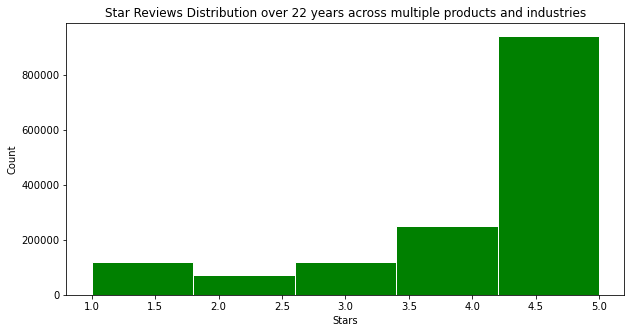

In [41]:
# Create Univariate Histrogram 

plt.figure(figsize=[10,5])

plt.hist(score_timeline['score'], bins=5, edgecolor='white', align='mid', color = 'green'); 

plt.xlabel("Stars");
plt.ylabel("Count");
plt.title("Star Reviews Distribution over 22 years across multiple products and industries");
plt.show();

In [42]:
# Group timeline subset using the mean on both columns

mean_timeline_ds = score_timeline.groupby(['date'], as_index = False).mean()
mean_timeline_ds.head(6)

,date,score,cnt,year
0,1997-08-09,5.0,1.0,1997.0
1,1997-08-13,1.0,1.0,1997.0
2,1997-08-17,5.0,1.0,1997.0
3,1997-08-21,3.0,1.0,1997.0
4,1997-08-23,4.0,1.0,1997.0
5,1997-08-25,3.0,1.0,1997.0


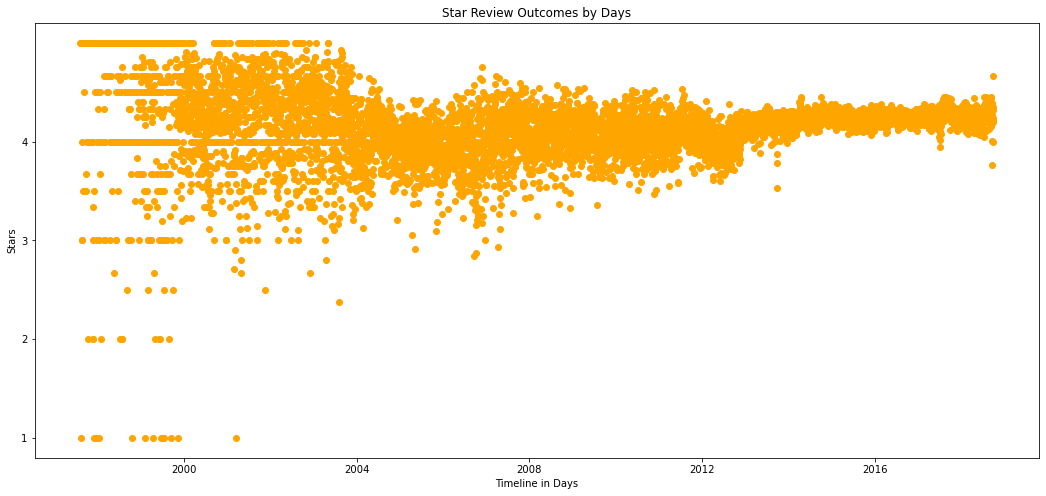

In [43]:
plt.figure(figsize=(18,8))
y = mean_timeline_ds['score']
x = mean_timeline_ds['date']
plt.scatter(x,y).set_color("orange");

plt.yticks(range(1, 5))

plt.title('Star Review Outcomes by Days')
plt.xlabel('Timeline in Days')
plt.ylabel('Stars');

In [44]:
# Group timeline subset using the year and mean on both columns

year_mean_timeline_ds = score_timeline.groupby(['year'], as_index = False).mean()
year_mean_timeline_ds.head(6)

,year,score,cnt
0,1997,4.178571,1.0
1,1998,4.445946,1.0
2,1999,4.306061,1.0
3,2000,4.248955,1.0
4,2001,4.252950,1.0
5,2002,4.220507,1.0


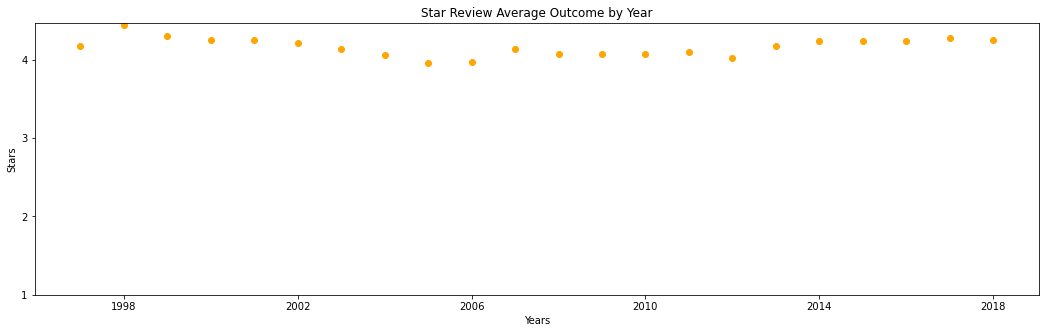

In [45]:
# Now plot by year

plt.figure(figsize=(18,5))
y = year_mean_timeline_ds['score']
x = year_mean_timeline_ds['year']
plt.scatter(x,y).set_color("orange");

plt.yticks(range(1, 5))
plt.xticks([1998, 2002, 2006, 2010, 2014, 2018])

plt.title('Star Review Average Outcome by Year')
plt.xlabel('Years')
plt.ylabel('Stars');

In [46]:
# Group timeline subset using sum on both columns

sum_timeline_ds = score_timeline.groupby(['date'], as_index = False).sum()
sum_timeline_ds.head(6)

,date,score,cnt,year
0,1997-08-09,5,1,1997
1,1997-08-13,1,1,1997
2,1997-08-17,5,1,1997
3,1997-08-21,3,1,1997
4,1997-08-23,4,1,1997
5,1997-08-25,9,3,5991


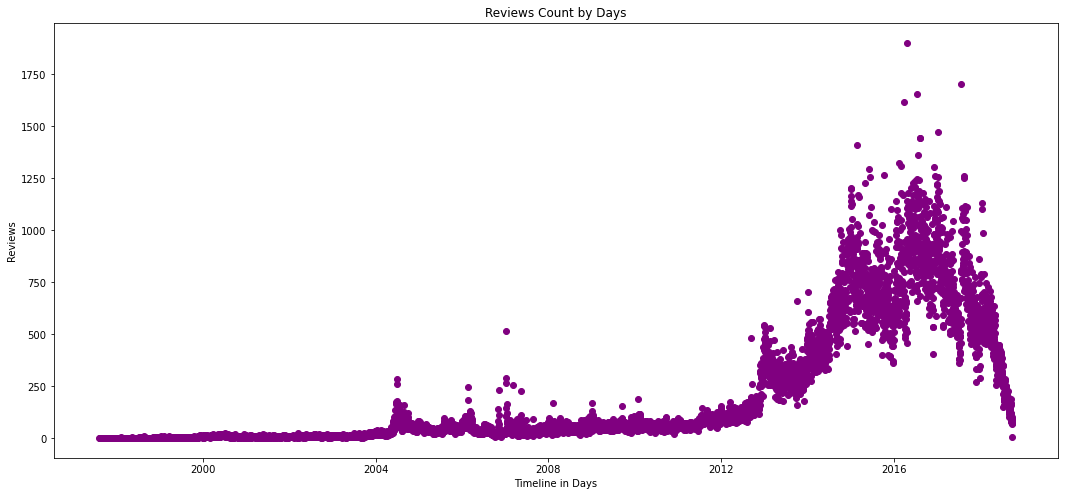

In [47]:
plt.figure(figsize=(18,8))
y = sum_timeline_ds['cnt']
x = sum_timeline_ds['date']
plt.scatter(x,y).set_color("purple");

plt.title('Reviews Count by Days')
plt.xlabel('Timeline in Days')
plt.ylabel('Reviews');

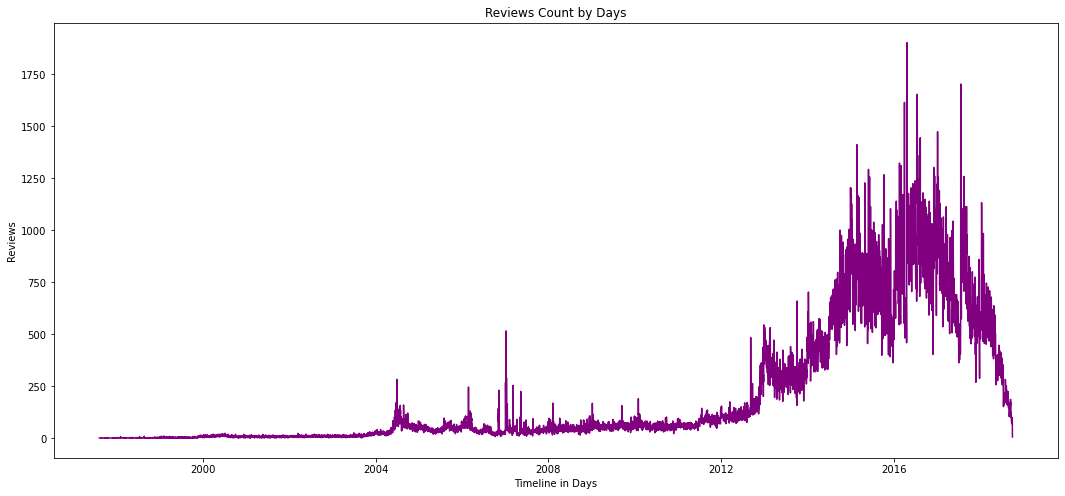

In [48]:
# Likely will look better with a line plot

plt.figure(figsize=(18,8))
new_y_limit = sns.lineplot(x = 'date', y = 'cnt', data = sum_timeline_ds, color = 'purple');

#new_y_limit.set_ylim(0, 5)
#new_y_limit.set_xlim(1998, 2018)

#new_y_limit.set(xticks=[1998, 2002, 2006, 2010, 2014, 2018], yticks=[1, 2, 3, 4, 5])

#Axes.set_xlim(self, left=None, right=None, emit=True, auto=False, *, xmin=None, xmax=None)
#Axes.set_ylim(self, bottom=None, top=None, emit=True, auto=False, *, ymin=None, ymax=None)


plt.title('Reviews Count by Days')
plt.xlabel('Timeline in Days')
plt.ylabel('Reviews');

In [49]:
# Seems we can benefit of a grouped year version of data

# Group timeline subset using the year and sum on both columns

year_sum_timeline_ds = score_timeline.groupby(['year'], as_index = False).sum()
year_sum_timeline_ds.head(6)

,year,score,cnt
0,1997,351,84
1,1998,1974,444
2,1999,5684,1320
3,2000,15241,3587
4,2001,11534,2712
5,2002,14489,3433


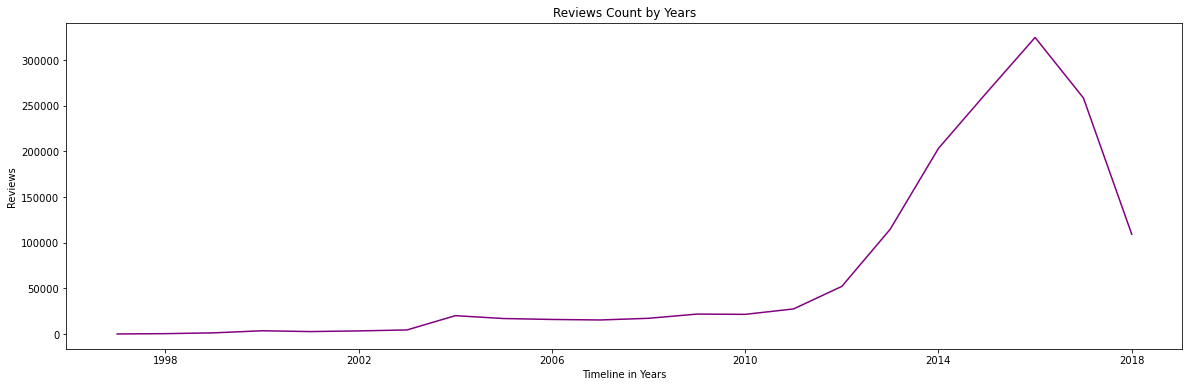

In [50]:
# Likely will look better with a line plot

plt.figure(figsize=(20,6))
new_yrs_limit = sns.lineplot(x = 'year', y = 'cnt', data = year_sum_timeline_ds, color = 'purple');

new_yrs_limit.set(xticks=[1998, 2002, 2006, 2010, 2014, 2018])

plt.title('Reviews Count by Years')
plt.xlabel('Timeline in Years')
plt.ylabel('Reviews');

In [51]:
# A final summary statistics overview of the scores

score_timeline['score'].describe()

count    1.499752e+06
mean     4.217880e+00
std      1.248376e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: score, dtype: float64

In [52]:
# Counting total of 5 stars records

fivestar_ds = rds[rds['score'] == 5]
fivestar_ds.shape

(942098, 12)

In [53]:
# Counting total of 4 stars records

fourstar_ds = rds[rds['score'] == 4]
fourstar_ds.shape

(249879, 12)

In [54]:
# Counting total of 3 stars records

threestar_ds = rds[rds['score'] == 3]
threestar_ds.shape

(118182, 12)

In [55]:
# Counting total of 2 stars records

twostar_ds = rds[rds['score'] == 2]
twostar_ds.shape

(71629, 12)

In [56]:
# Counting total of 1 star records

onestar_ds = rds[rds['score'] == 1]
onestar_ds.shape

(117964, 12)

In [57]:
grp_by_year_and_score = score_timeline.groupby(['year','score']).count().reset_index()
grp_by_year_and_score.drop(['date'], axis = 1, inplace = True)
display(grp_by_year_and_score)

,year,score,cnt
0,1997,1,6
1,1997,2,6
2,1997,3,4
3,1997,4,19
4,1997,5,49
...,...,...,...
105,2018,1,9433
106,2018,2,4908
107,2018,3,7471
108,2018,4,14084


In [58]:
grp_by_year_and_score.columns

Index(['year', 'score', 'cnt'], dtype='object')

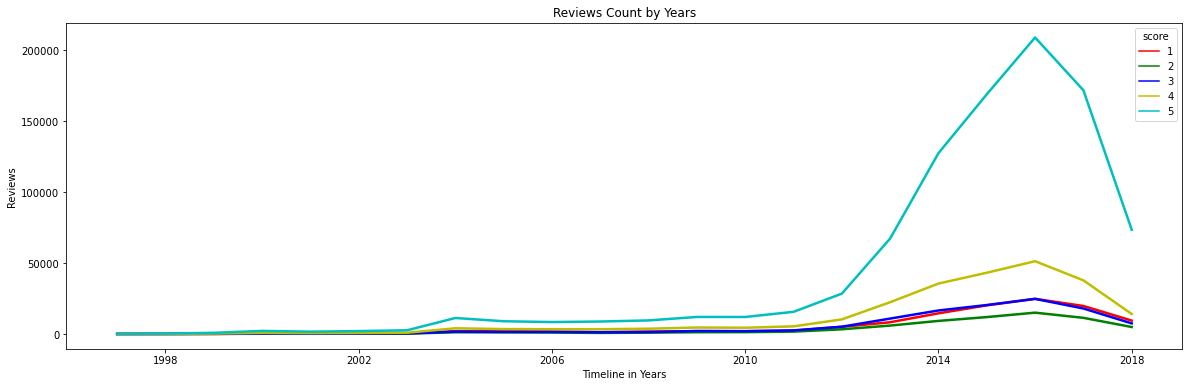

In [59]:
# Combining all of the score per group of star rating over the years with lines

plt.figure(figsize=(20,6))
score_combo_limits = sns.lineplot(x='year', y='cnt', hue='score', data=grp_by_year_and_score, palette=['r', 'g', 'b', 'y', 'c'], linewidth=2.5);

#score_combo_limits = sns.lineplot(x='year', y='cnt', hue='score', data=grp_by_year_and_score, linewidth=2.5);

score_combo_limits.set(xticks=[1998, 2002, 2006, 2010, 2014, 2018])

plt.title('Reviews Count by Years')
plt.xlabel('Timeline in Years')
plt.ylabel('Reviews');

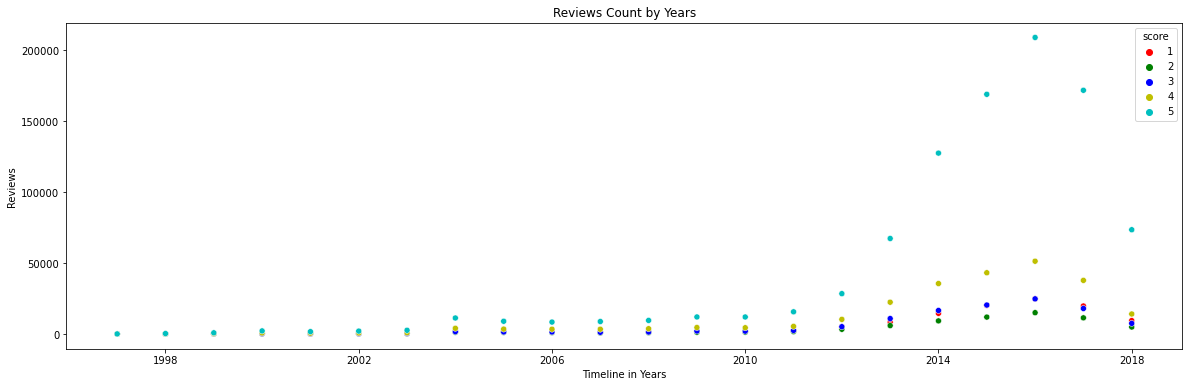

In [60]:
# Combining all of the score per group of star rating over the years with a scatter plot

plt.figure(figsize=(20,6))
score_combo_s_limits = sns.scatterplot(x='year', y='cnt', hue='score', data=grp_by_year_and_score, palette=['r', 'g', 'b', 'y', 'c']);

score_combo_s_limits.set(xticks=[1998, 2002, 2006, 2010, 2014, 2018])

plt.title('Reviews Count by Years')
plt.xlabel('Timeline in Years')
plt.ylabel('Reviews');

<div class="alert alert-block alert-warning">
<h2> Process Insights 7/30/2023</h2>
-------------------------------------------------------------------------------------------------------------------------------

- There is an overall trend towards more reviews over time accentuated since 2013 which is a good thing as more data can be leveraged on, however, the trend reaches it's peak at year 2016 and then goes back in 2017 to a similar data point as the year prior to the peak (back to 2015 numbers). Then 2018 while incomplete, still seems to now might be less than 2015 yet data might be incomplete so needs to be confirmed once the 2018 data is complete. 
- Score/Review of 1 star only accounts for 117,964 of the 1'499,752 reviews which is 7.87%.
- Score/Review of 4 stars accounts for 249,879 of the 1'499,752 reviews which is 16.66%.
- Score/Review of 5 stars accounts for 942,098 of the 1'499,752 reviews which is 62.82%.
    
    <h3> It is an overwhelming mayority of positive reviews (79.48% with either 5 or 4 stars and mean of 4.21 stars) which allows to better extract what is that consumers like and/or enjoy the most which allows to suggest new products and/or predict customer satisfaction per market needs. Now we need to move into an specific industry/category for which we are selecting the Software category. </h3> 
       
</div>


## Software industry prep work prior to EDA

> Pull and review the new data set for software category

> Compare datasets and merge if they are aligned

> Confirm merge process was done properly


In [61]:
# Using data set acronym as SoftWare Reviews Data Set as swrds

datathon_eda_sw_industry_reviews_file = "/Users/dslab/datathon_73023_AM.parquet"
swrds = pd.read_parquet(datathon_eda_sw_industry_reviews_file, engine='pyarrow')

In [62]:
# Using data set acronym as SoftWare Metadata Data Set as swmds

datathon_metadata_pkt_731_file = "/Users/dslab/mds_73123_PM.parquet"
swmds = pd.read_parquet(datathon_metadata_pkt_731_file, engine='pyarrow')

In [63]:
# Checking size of the software reviews data set

swrds.shape

(292055, 12)

In [64]:
# Checking size of the software metadata data set

swmds.shape

(22529, 3)

In [65]:
# Checking the amount of products at the review data set

swrds['asin'].describe()

count         292055
unique         13209
top       B00CTTEKJW
freq            7929
Name: asin, dtype: object

In [66]:
# Checking the amount of products at the metadata data set

swmds['asin'].describe()

count          22529
unique         22529
top       0030672120
freq               1
Name: asin, dtype: object

### Checking relationship of asin among the 2 data frames

In [67]:
# Reviews data set against Metadata data set

swrds['asin'].isin(swmds['asin']).value_counts()

True    292055
Name: asin, dtype: int64

In [68]:
# Reviews data set against Review data set

swmds['asin'].isin(swrds['asin']).value_counts()

True     13209
False     9320
Name: asin, dtype: int64

### Merging and checking

In [69]:
# Using acronym One Data Set as ods

ods = pd.merge(swrds, swmds, how='inner', on='asin')

# Making sure all rows of Reviews are still at data set

ods.shape

(292055, 14)

In [70]:
# Making sure all columns are togheter and complete except summary and reviewText

ods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292055 entries, 0 to 292054
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   asin         292055 non-null  object        
 1   score        292055 non-null  int64         
 2   reviewText   292030 non-null  object        
 3   reviewerID   292055 non-null  object        
 4   summary      292031 non-null  object        
 5   timestamp    292055 non-null  datetime64[ns]
 6   verified     292055 non-null  object        
 7   date         292055 non-null  datetime64[ns]
 8   year         292055 non-null  int64         
 9   month        292055 non-null  int64         
 10  day          292055 non-null  int64         
 11  day_of_week  292055 non-null  int64         
 12  brand        292055 non-null  object        
 13  title        292055 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(7)
memory usage: 33.4+ MB


In [71]:
# Taking a peak at the brand column as will be key to start filtering into a subgroup

ods['brand'].describe()

count     292055
unique      2681
top       Intuit
freq       57889
Name: brand, dtype: object

## Software industry to add stream data work prior to EDA

> Pull and review the streaming data to review what we can add to the software category data set

> Compare datasets and merge if aligned

> Check merge success


In [72]:
# Acronym for the Streaming Data Set is sds

datathon_first_streaming_pkt_731_file = "/Users/dslab/Downloads/stream_40223_samples.parquet"
sds = pd.read_parquet(datathon_first_streaming_pkt_731_file, engine='pyarrow')

In [73]:
# Count the stream data products

ods['asin'].describe()

count         292055
unique         13209
top       B00CTTEKJW
freq            7929
Name: asin, dtype: object

In [74]:
# Count the stream data products

sds['asin'].describe()

count          40223
unique          2806
top       B015R4DH2G
freq            2126
Name: asin, dtype: object

### Checking relationship of asin among the 2 data frames

In [75]:
# Reviews & Metadata data set against Streaming data set

ods['asin'].isin(sds['asin']).value_counts()

False    292055
Name: asin, dtype: int64

In [76]:
# Streaming data set against Reviews & Metadata data set

sds['asin'].isin(ods['asin']).value_counts()

False    40223
Name: asin, dtype: int64

<div class="alert alert-block alert-warning">
<h2> Process Insights 7/31/2023</h2>
-------------------------------------------------------------------------------------------------------------------------------

- Stream data is not adding values to the software category.
- Thus merge can not be completed as there is nothing to merge into.
    
    <h3> While we decide to pursue or pivot we will go ahead and extract a subset of the category that makes sense. </h3> 
       
</div>


## Note:

### We then moved into the Software Category yet after noticing that streaming data was about only 2 categories, we decided to finally select the Musical Category.

#### Continues at part II ...